<a href="https://colab.research.google.com/github/luisescobar09/AnalisisDeDatos/blob/main/BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración previa:**

**Versión de Python:**

In [1]:
!python --version

Python 3.10.11


**Importar líbrerias:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Preparación de los datos:**

**Cargar el archivo de Excel:**

In [3]:
df = pd.read_excel('/content/accidents.xlsx')

**Ver los primeros 5 registros del DataFrame:**

In [44]:
print(df.head(3))

   Year Date Of Incident Route        Operator  Group Name  \
0  2015       2015-01-01     1  London General    Go-Ahead   
1  2015       2015-01-01     4       Metroline   Metroline   
2  2015       2015-01-01     5     East London  Stagecoach   

             Bus Garage    Borough  \
0  Garage Not Available  Southwark   
1  Garage Not Available  Islington   
2  Garage Not Available   Havering   

                           Injury Result Description Incident Event Type  \
0                          Injuries treated on scene    Onboard Injuries   
1                          Injuries treated on scene    Onboard Injuries   
2  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   

  Victim Category Victims Sex Victims Age  
0       Passenger        Male       Child  
1       Passenger        Male     Unknown  
2       Passenger        Male     Elderly  


**Obtener información sobre las columnas y tipos de datos:**

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

**Visualización del tamaño del dataset:**

In [7]:
print(df.shape) # FILAS, COLUMNAS

(23158, 12)


**Obtener estadísticas descriptivas de las columnas numéricas:**

In [6]:
print(df.describe())

               Year
count  23158.000000
mean    2016.449607
std        1.074073
min     2015.000000
25%     2016.000000
50%     2016.000000
75%     2017.000000
max     2018.000000


**Revisión de registros:**

In [8]:
df.isnull().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

**Visualizar el tipo de datos de la columnas:**

In [9]:
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

# **Analisis y exploración de los datos:**

## **1. Tendencias de accidentes.**

**Frecuencia de accidentes por año:**

In [10]:
accidentes_por_anio = df.groupby('Year').size() 
# el método groupby() agrupa los datos por año y al aplicar la función .size() obtiene la cantidad de accidentes por año.

print(accidentes_por_anio)

Year
2015    5715
2016    6093
2017    6573
2018    4777
dtype: int64


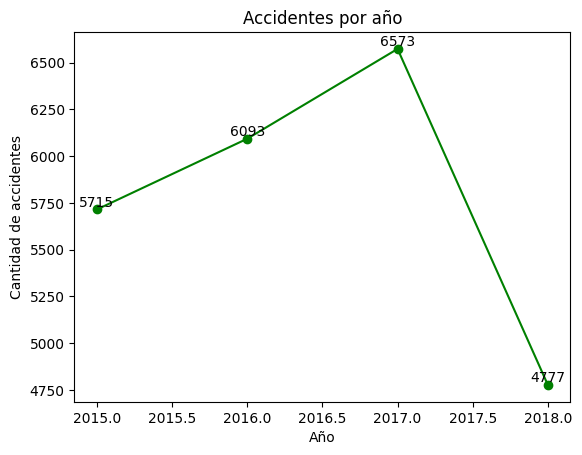

In [11]:
# Crear la gráfica utlizando la función plot() de matplotlib
accidentes_por_anio.plot(kind='line', marker="o", color="green")
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Accidentes por año')

# Agregar los valores encima de cada marca
for x, y in zip(accidentes_por_anio.index, accidentes_por_anio.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

## **2. Rutas más peligrosas.**

**Rutas de autobús que presentan mayor incidencia de accidentes:**

In [12]:
incidencia_rutas = df['Route'].value_counts()
print(incidencia_rutas)

OOS    321
18     191
55     177
24     165
73     156
      ... 
669      1
N28      1
612      1
327      1
602      1
Name: Route, Length: 612, dtype: int64


In [13]:
top_10_rutas = incidencia_rutas.head(10)
print(top_10_rutas)

OOS    321
18     191
55     177
24     165
73     156
96     155
149    154
207    153
25     143
137    136
Name: Route, dtype: int64


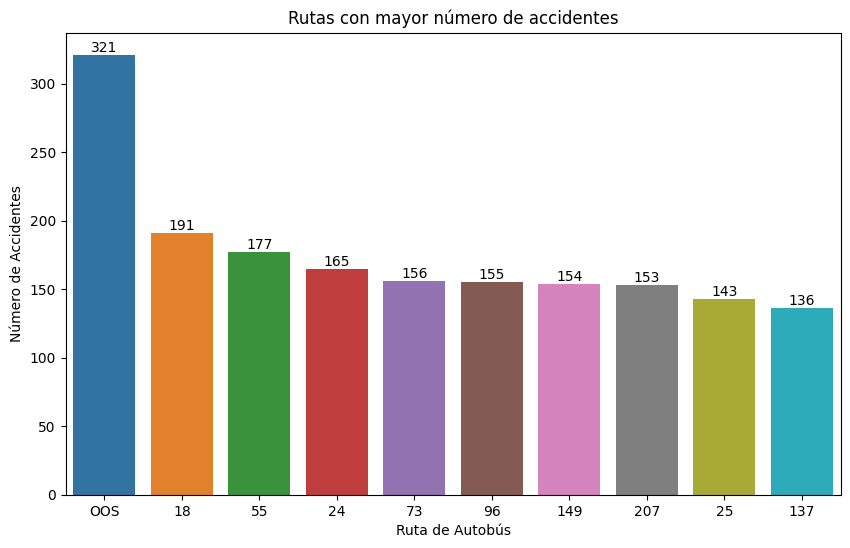

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_rutas.index, y=top_10_rutas.values, errorbar=None)
plt.xlabel('Ruta de Autobús')
plt.ylabel('Número de Accidentes')
plt.title('Rutas con mayor número de accidentes')

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##**3. Operadores con más incidentes** 

**Compañías de autobuses que presentan un mayor número de incidentes:**

In [15]:
top_companias = df['Operator'].value_counts()
print(top_companias)

Metroline                3457
Arriva London North      3208
East London              2402
London United            2263
Selkent                  1808
Arriva London South      1743
London General           1723
London Central           1367
Metroline West           1232
Abellio London            963
Metrobus                  786
Tower Transit             738
Arriva The Shires         305
Blue Triangle Buses       281
London Sovereign          206
Quality Line              142
Abellio West              126
Arriva Kent Thameside     107
Docklands Buses           100
C T Plus                   77
TGM GROUP                  61
H R Richmond               59
Sullivan Buses              2
Uno Buses                   1
Sullivan Bus & Coach        1
Name: Operator, dtype: int64


In [16]:
top_10_companias = top_companias.head(15)
print(top_10_companias)

Metroline              3457
Arriva London North    3208
East London            2402
London United          2263
Selkent                1808
Arriva London South    1743
London General         1723
London Central         1367
Metroline West         1232
Abellio London          963
Metrobus                786
Tower Transit           738
Arriva The Shires       305
Blue Triangle Buses     281
London Sovereign        206
Name: Operator, dtype: int64


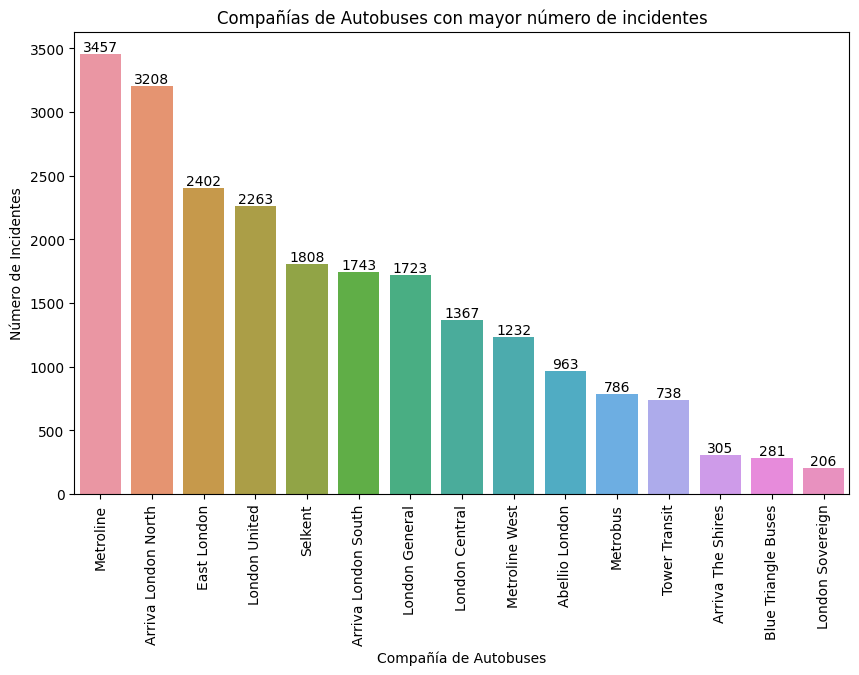

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_companias.index, y=top_10_companias.values, errorbar=None)
plt.xlabel('Compañía de Autobuses')
plt.ylabel('Número de Incidentes')
plt.title('Compañías de Autobuses con mayor número de incidentes')
plt.xticks(rotation=90)
# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## **4. Impacto de lesiones** 

**Tipo y la gravedad de las lesiones resultantes de los accidentes de autobús:**

In [18]:
injuries = df['Injury Result Description'].value_counts()
print(injuries)

Injuries treated on scene                                          17336
Taken to Hospital – Reported Serious Injury or Severity Unknown     2994
Reported Minor Injury - Treated at Hospital                         2786
Fatal                                                                 42
Name: Injury Result Description, dtype: int64


In [19]:
lesiones = ['Lesiones tratadas en el lugar', 'Llevado al hospital: lesión grave informada o gravedad desconocida', 'Lesión menor reportada - tratada en el hospital', 'Accidente fatal']

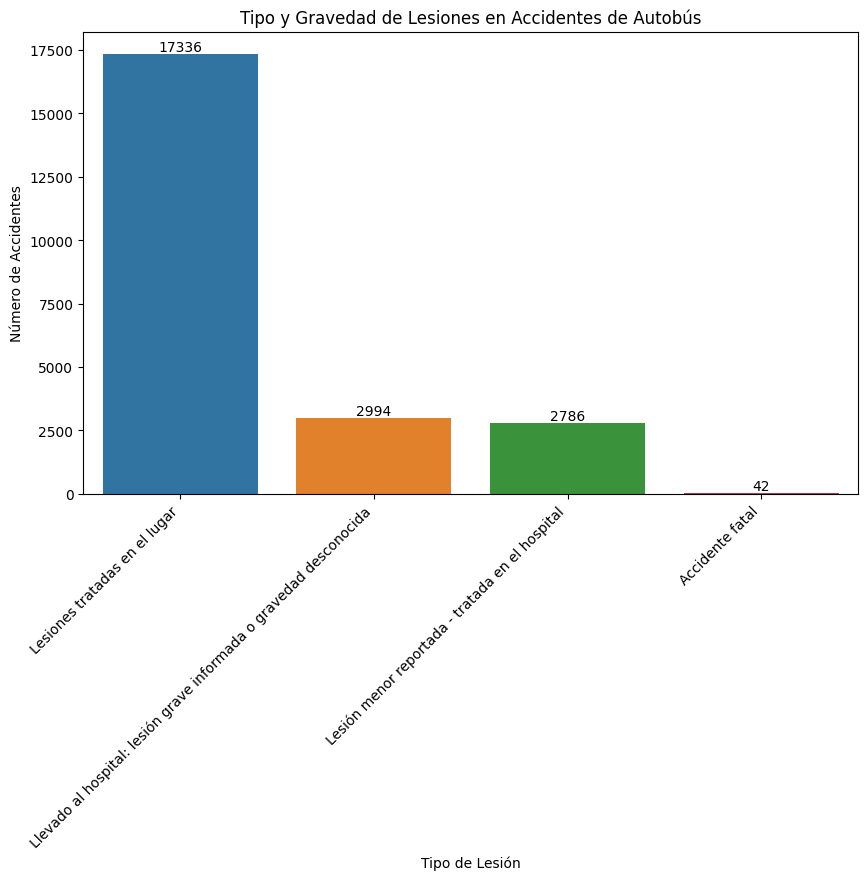

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lesiones, y=injuries.values, errorbar=None)
plt.xlabel('Tipo de Lesión')
plt.ylabel('Número de Accidentes')
plt.title('Tipo y Gravedad de Lesiones en Accidentes de Autobús')

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

## **5. Análisis demográfico de las víctimas** 

 ### **5.1 Categoría de víctimas**

In [38]:
categorias = df['Victim Category'].value_counts().head(11)
print(categorias)

Passenger                      18828
Pedestrian                      1612
Bus Driver                      1484
3rd Party driver / Occupant      573
Cyclist                          275
Member Of Public                 127
Motorcyclist                     102
Operational Staff                 59
Cyclist                           33
Conductor                         28
Other                             16
Name: Victim Category, dtype: int64


In [39]:
porcentajes = (categorias / len(df)) * 100
for categoria, porcentaje in zip(categorias.index, porcentajes):
    print(f"{categoria}: {porcentaje:.2f}%")

Passenger: 81.30%
Pedestrian: 6.96%
Bus Driver: 6.41%
3rd Party driver / Occupant: 2.47%
Cyclist: 1.19%
Member Of Public: 0.55%
Motorcyclist: 0.44%
Operational Staff: 0.25%
Cyclist : 0.14%
Conductor: 0.12%
Other: 0.07%


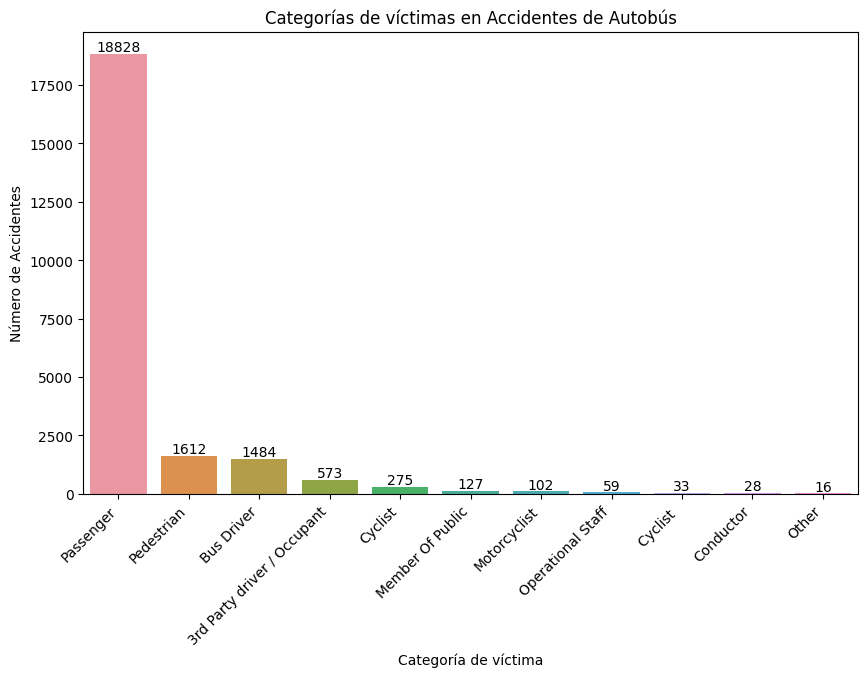

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=categorias.index, y=categorias.values, errorbar=None)
plt.xlabel('Categoría de víctima')
plt.ylabel('Número de Accidentes')
plt.title('Categorías de víctimas en Accidentes de Autobús')

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

 ### **5.2 Género de víctimas**

In [41]:
generos = df['Victims Sex'].value_counts()
print(generos)

Female     11847
Male        7709
Unknown     3602
Name: Victims Sex, dtype: int64


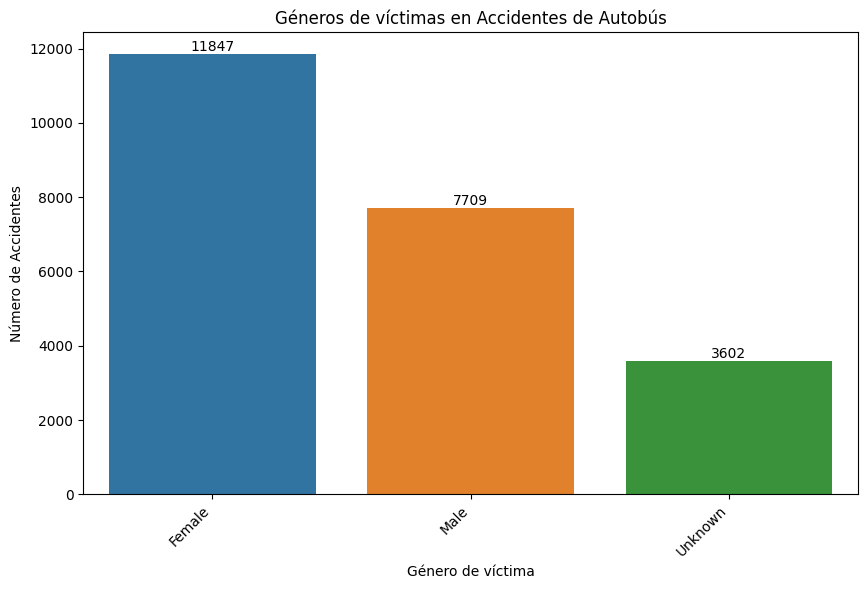

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=generos.index, y=generos.values, errorbar=None)
plt.xlabel('Género de víctima')
plt.ylabel('Número de Accidentes')
plt.title('Géneros de víctimas en Accidentes de Autobús')

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

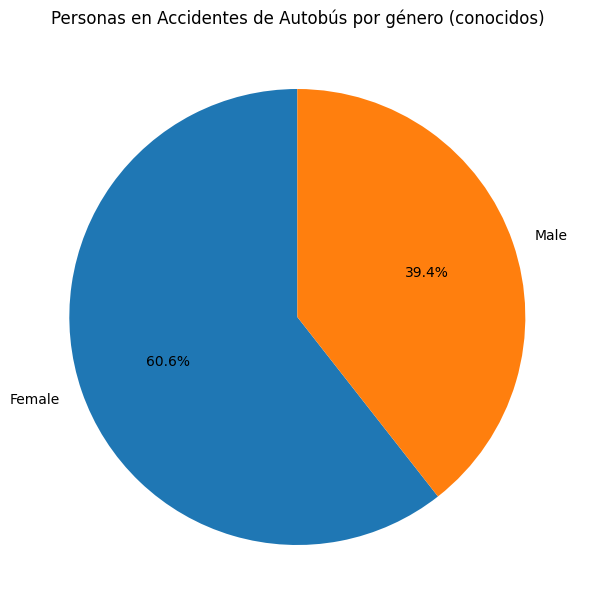

In [37]:
generos_conocidos = generos.head(2)
plt.figure(figsize=(10, 6))
plt.pie(generos_conocidos.values, labels=generos_conocidos.index, autopct='%1.1f%%', startangle=90)

# Colocar los valores dentro de cada rebanada
plt.gca().set_aspect('equal')  # Ajustar el aspecto para que sea un círculo perfecto
plt.tight_layout()  # Ajustar el espaciado

plt.title('Personas en Accidentes de Autobús por género (conocidos)')
plt.show()

 ### **5.3 Edad de víctimas por etapa**

In [43]:
edades = df['Victims Age'].value_counts()
print(edades)

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: Victims Age, dtype: int64


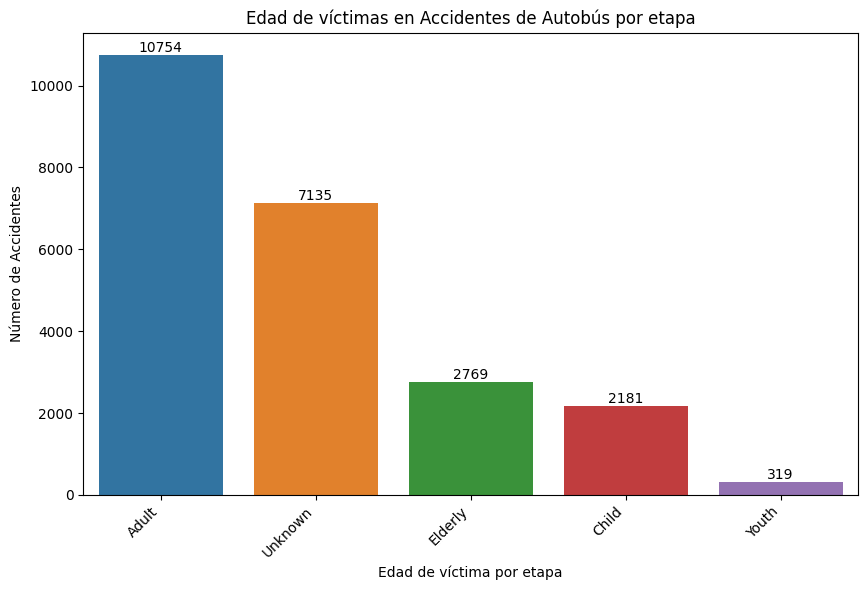

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=edades.index, y=edades.values, errorbar=None)
plt.xlabel('Edad de víctima por etapa')
plt.ylabel('Número de Accidentes')
plt.title('Edad de víctimas en Accidentes de Autobús por etapa')

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

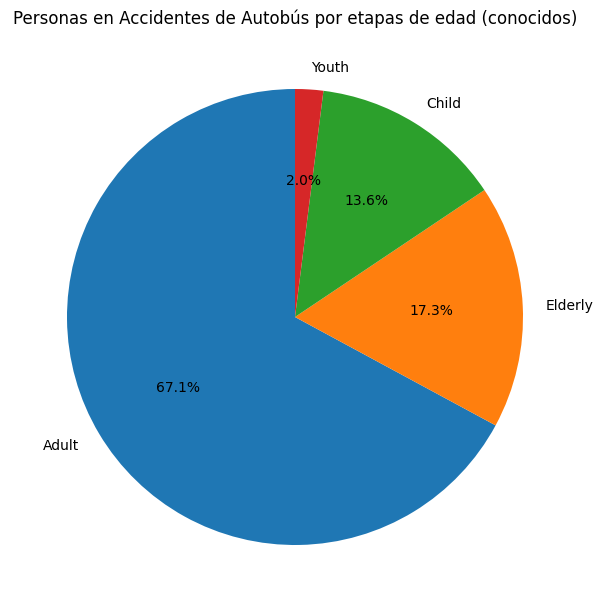

In [51]:
edades_conocidos = edades[edades.index != "Unknown"]
plt.figure(figsize=(10, 6))
plt.pie(edades_conocidos.values, labels=edades_conocidos.index, autopct='%1.1f%%', startangle=90)

# Colocar los valores dentro de cada rebanada
plt.gca().set_aspect('equal')  # Ajustar el aspecto para que sea un círculo perfecto
plt.tight_layout()  # Ajustar el espaciado

plt.title('Personas en Accidentes de Autobús por etapas de edad (conocidos)')
plt.show()

# **Conclusión:**

*   *El análisis de los datos de accidentes de autobús puede proporcionar información valiosa para identificar tendencias, áreas de riesgo y grupos de mayor vulnerabilidad.*

# **Toma de decisiones:**

## **1. Tendencias de accidentes:**



*   *Al identificar años con un alto número de accidentes, se pueden investigar las posibles causas de esos aumentos.*
*   *Cambios en las regulaciones de seguridad.*
*   *Problemas de mantenimiento de los vehículos.*
*   *Problemas en factores externos como el clima o la congestión del tráfico.*

*Con esta información se pueden implementar medidas preventivas y de seguridad específicas para abordar las causas identificadas.*

## **2. Rutas más peligrosas:**

Identificar las rutas con una mayor incidencia de accidentes permitiría enfocar los esfuerzos de seguridad en esas áreas, llevando a cabo:
*   *Mejoras en la infraestructura vial.*
*   *Aumentar la señalización.*
*   *Implementar medidas adicionales de seguridad, como la instalación de cámaras de vigilancia o la asignación de más personal de seguridad en esas rutas.*

## **3. Operadores con más incidentes:**

 Identificar las compañías de autobuses con un mayor número de incidentes permite tomar medidas de corrección como:
*   *Brindar capacitación adicional a los choferes como técnicas de conducción defensiva.*
*   *Revisar los protocolos de seguridad y mantenimiento de las unidades.*
*   *Mayor auditoría en esas operadoras.*

## **4. Impacto de lesiones:**

Al analizar es posible identificar los tipos de lesiones más frecuentes en los accidentes de autobús, como fracturas, contusiones, heridas graves, etc. Esta información puede ayudar a comprender los riesgos asociados con los accidentes y desarrollar estrategias de prevención específicas:
*   *Priorizar las medidas de seguridad y mejorar los protocolos de atención médica y de emergencia en la región*
*   *Medidas específicas para abordar las diferentes situaciones y reducir el riesgo de lesiones.*
*   *Realizar un seguimiento y evaluación periódica para determinar su efectividad en la reducción de lesiones en los accidentes de autobús.*



## **5. Análisis demográfico de las víctimas:**

Analizar las características demográficas de las víctimas puede ayudar a diseñar estrategias de seguridad más efectivas como:
*   *Establecer políticas específicas para garantizar su seguridad, como asignar asientos preferentes a personas mayores, mujeres embarazadas y niños.*
*   *Campañas de concienciación y educación dirigidas a cada grupo.*